In [1]:
import os
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm

In [2]:
pd.options.display.max_columns = 500

In [3]:
geir_path = "/geir_data/scr/petershi" #should save work here 
sdssv_path = "/yngve_data/sdssv/ipl-2/spectro/astra/0.3.0/v6_0_9-1.0/spectra/star" #path for SDSSV spectra
sdssiv_path = "/yngve_data/sdss/apogee/dr17/apogee/spectro/redux/dr17/stars/apo25m"

In [4]:
points = pd.read_csv(os.path.join(geir_path, "serialized", "SDSS-V (ALL) points.csv"))
errs = pd.read_csv(os.path.join(geir_path, "serialized", "SDSS-V (ALL) errors.csv"))

In [5]:
points

,teff,logg,C,C1,N,O,Na,Mg,Al,Si,P,S,K,Ca,Ti,Ti2,V,Cr,Mn,Fe,Co,Ni,ID
0,5001.8950,2.927381,-1.729562,-1.684120,-1.223402,-1.327669,-1.476161,-1.346016,-1.774099,-1.299784,-1.648614,-1.348766,-1.349686,-1.366100,-1.571469,-1.128999,-1.608194,-1.755825,-1.754360,-1.439668,-1.771176,-1.410330,18014398509500000
1,5249.5830,3.278000,-0.899410,-0.941167,-0.661494,-0.856907,-1.070747,-0.902507,-1.121465,-0.832273,-1.134128,-0.806284,-0.899248,-0.745899,-1.006812,-1.119093,-1.151990,-0.828855,-0.990146,-0.880430,-0.853149,-0.841444,18014398509600000
2,4768.3213,2.523283,-0.316444,-0.336689,-0.050195,-0.144555,-0.200466,-0.119395,-0.106314,-0.136983,-0.098327,-0.137919,-0.096495,-0.191675,-0.198445,-0.113503,-0.346895,-0.230282,-0.258253,-0.225171,-0.183868,-0.219733,18014398509700000
3,4286.3223,1.720010,-0.114304,-0.199076,0.328487,-0.018169,0.087609,-0.023785,-0.029705,-0.021323,-0.094621,0.000387,-0.007296,-0.047985,0.007456,0.121837,-0.216464,0.034599,0.052830,-0.006860,0.102429,-0.019045,27021597767422950
4,3895.2050,1.056683,-0.272898,-0.317061,-0.049704,-0.174320,-0.142460,-0.160578,-0.275781,-0.239657,-0.189714,-0.135592,-0.162172,-0.260645,-0.141171,-0.112485,-0.379410,-0.226559,-0.156988,-0.244917,-0.123063,-0.239275,27021597767427884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152019,5530.1187,3.617186,-1.632130,-1.704908,-0.918701,-1.291456,-1.560070,-1.414284,-1.783239,-1.320813,-1.592670,-1.463333,-1.472299,-1.366458,-1.675458,-1.384805,-1.634728,-1.518788,-1.729522,-1.452010,-1.805641,-1.500693,661746642
152020,5345.0864,2.709178,-1.663889,-1.811195,-0.843599,-1.365924,-1.799592,-1.466799,-1.775646,-1.356421,-1.783506,-1.505004,-1.486507,-1.478287,-1.766416,-1.726700,-1.696969,-1.634130,-1.788752,-1.571570,-1.830706,-1.552582,661789240
152021,6124.2256,4.000569,-0.464431,-0.609206,-0.217726,-0.445019,-0.580895,-0.601262,-0.704125,-0.456610,-0.763871,-0.626000,-0.635160,-0.581522,-0.723411,-0.674071,-0.623242,-0.787011,-0.649612,-0.551816,-0.809881,-0.635935,736959791
152022,6265.7680,4.165556,-0.403069,-0.474668,-0.017078,-0.271267,-0.432093,-0.417761,-0.498796,-0.276195,-0.469224,-0.401563,-0.411628,-0.379883,-0.510927,-0.439503,-0.452577,-0.644481,-0.423342,-0.388630,-0.637619,-0.430832,736959817


In [6]:
df = pd.concat([points, 
                errs.rename(mapper = (lambda x : x + "_err"), axis = 1)
                ], axis = 1)

del df["ID_err"]

In [7]:
df["Mg/Fe"] = df["Mg"] - df["Fe"]

In [8]:
filt = df[df["logg_err"] < 0.2]

In [9]:
df

,teff,logg,C,C1,N,O,Na,Mg,Al,Si,P,S,K,Ca,Ti,Ti2,V,Cr,Mn,Fe,Co,Ni,ID,teff_err,logg_err,C_err,C1_err,N_err,O_err,Na_err,Mg_err,Al_err,Si_err,P_err,S_err,K_err,Ca_err,Ti_err,Ti2_err,V_err,Cr_err,Mn_err,Fe_err,Co_err,Ni_err,Mg/Fe
0,5001.8950,2.927381,-1.729562,-1.684120,-1.223402,-1.327669,-1.476161,-1.346016,-1.774099,-1.299784,-1.648614,-1.348766,-1.349686,-1.366100,-1.571469,-1.128999,-1.608194,-1.755825,-1.754360,-1.439668,-1.771176,-1.410330,18014398509500000,314.276411,0.806827,0.343046,0.421515,0.405833,0.289429,0.555590,0.280938,0.418718,0.310921,20.734077,0.219436,0.274067,0.271006,0.362115,0.229195,0.464337,0.848877,0.364936,0.376368,0.729872,0.275201,0.093652
1,5249.5830,3.278000,-0.899410,-0.941167,-0.661494,-0.856907,-1.070747,-0.902507,-1.121465,-0.832273,-1.134128,-0.806284,-0.899248,-0.745899,-1.006812,-1.119093,-1.151990,-0.828855,-0.990146,-0.880430,-0.853149,-0.841444,18014398509600000,318.561243,0.571616,0.187798,0.244012,0.289159,0.206510,0.515838,0.216157,0.299574,0.210858,9.922722,0.199121,0.288729,0.190795,0.289244,0.283349,0.393611,0.165968,0.216226,0.258080,0.193116,0.202271,-0.022077
2,4768.3213,2.523283,-0.316444,-0.336689,-0.050195,-0.144555,-0.200466,-0.119395,-0.106314,-0.136983,-0.098327,-0.137919,-0.096495,-0.191675,-0.198445,-0.113503,-0.346895,-0.230282,-0.258253,-0.225171,-0.183868,-0.219733,18014398509700000,31.062445,0.073004,0.025003,0.050676,0.020568,0.017352,0.071566,0.018279,0.032881,0.029735,0.473039,0.020549,0.078617,0.031436,0.031333,0.027562,0.087563,0.034146,0.034169,0.021091,0.025196,0.024912,0.105775
3,4286.3223,1.720010,-0.114304,-0.199076,0.328487,-0.018169,0.087609,-0.023785,-0.029705,-0.021323,-0.094621,0.000387,-0.007296,-0.047985,0.007456,0.121837,-0.216464,0.034599,0.052830,-0.006860,0.102429,-0.019045,27021597767422950,25.508763,0.068006,0.032441,0.051759,0.047838,0.026809,0.059049,0.027166,0.025384,0.049803,0.510087,0.020980,0.045163,0.033696,0.043225,0.075068,0.045817,0.041800,0.051114,0.022873,0.046614,0.036169,-0.016924
4,3895.2050,1.056683,-0.272898,-0.317061,-0.049704,-0.174320,-0.142460,-0.160578,-0.275781,-0.239657,-0.189714,-0.135592,-0.162172,-0.260645,-0.141171,-0.112485,-0.379410,-0.226559,-0.156988,-0.244917,-0.123063,-0.239275,27021597767427884,27.393448,0.064281,0.024940,0.028717,0.029571,0.030898,0.046563,0.026526,0.043268,0.028336,0.598261,0.023187,0.048831,0.032461,0.065154,0.094632,0.037013,0.033672,0.061978,0.029479,0.041704,0.028681,0.084339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152019,5530.1187,3.617186,-1.632130,-1.704908,-0.918701,-1.291456,-1.560070,-1.414284,-1.783239,-1.320813,-1.592670,-1.463333,-1.472299,-1.366458,-1.675458,-1.384805,-1.634728,-1.518788,-1.729522,-1.452010,-1.805641,-1.500693,661746642,371.825677,0.723862,0.340978,0.420177,0.874420,0.339640,1.638790,0.328176,0.478432,0.329603,50.194295,0.290195,0.490608,0.323121,0.517701,0.377596,0.579059,0.599453,0.409722,0.410327,0.937523,0.351991,0.037727
152020,5345.0864,2.709178,-1.663889,-1.811195,-0.843599,-1.365924,-1.799592,-1.466799,-1.775646,-1.356421,-1.783506,-1.505004,-1.486507,-1.478287,-1.766416,-1.726700,-1.696969,-1.634130,-1.788752,-1.571570,-1.830706,-1.552582,661789240,303.417122,0.558122,0.293002,0.389510,0.831818,0.295173,1.846861,0.293351,0.436941,0.299600,12.378812,0.257926,0.364908,0.306365,0.439560,0.286618,0.516609,0.360090,0.342710,0.342450,0.589025,0.284082,0.104771
152021,6124.2256,4.000569,-0.464431,-0.609206,-0.217726,-0.445019,-0.580895,-0.601262,-0.704125,-0.456610,-0.763871,-0.626000,-0.635160,-0.581522,-0.723411,-0.674071,-0.623242,-0.787011,-0.649612,-0.551816,-0.809881,-0.635935,736959791,278.460967,0.338788,0.113079,0.134609,0.534894,0.144900,0.351546,0.143330,0.222561,0.143753,3.117592,0.155341,0.287124,0.164587,0.352347,0.178676,0.212211,0.473596,0.196432,0.165255,0.451413,0.151334,-0.049446
152022,6265.7680

In [10]:
filt

,teff,logg,C,C1,N,O,Na,Mg,Al,Si,P,S,K,Ca,Ti,Ti2,V,Cr,Mn,Fe,Co,Ni,ID,teff_err,logg_err,C_err,C1_err,N_err,O_err,Na_err,Mg_err,Al_err,Si_err,P_err,S_err,K_err,Ca_err,Ti_err,Ti2_err,V_err,Cr_err,Mn_err,Fe_err,Co_err,Ni_err,Mg/Fe
2,4768.3213,2.523283,-0.316444,-0.336689,-0.050195,-0.144555,-0.200466,-0.119395,-0.106314,-0.136983,-0.098327,-0.137919,-0.096495,-0.191675,-0.198445,-0.113503,-0.346895,-0.230282,-0.258253,-0.225171,-0.183868,-0.219733,18014398509700000,31.062445,0.073004,0.025003,0.050676,0.020568,0.017352,0.071566,0.018279,0.032881,0.029735,0.473039,0.020549,0.078617,0.031436,0.031333,0.027562,0.087563,0.034146,0.034169,0.021091,0.025196,0.024912,0.105775
3,4286.3223,1.720010,-0.114304,-0.199076,0.328487,-0.018169,0.087609,-0.023785,-0.029705,-0.021323,-0.094621,0.000387,-0.007296,-0.047985,0.007456,0.121837,-0.216464,0.034599,0.052830,-0.006860,0.102429,-0.019045,27021597767422950,25.508763,0.068006,0.032441,0.051759,0.047838,0.026809,0.059049,0.027166,0.025384,0.049803,0.510087,0.020980,0.045163,0.033696,0.043225,0.075068,0.045817,0.041800,0.051114,0.022873,0.046614,0.036169,-0.016924
4,3895.2050,1.056683,-0.272898,-0.317061,-0.049704,-0.174320,-0.142460,-0.160578,-0.275781,-0.239657,-0.189714,-0.135592,-0.162172,-0.260645,-0.141171,-0.112485,-0.379410,-0.226559,-0.156988,-0.244917,-0.123063,-0.239275,27021597767427884,27.393448,0.064281,0.024940,0.028717,0.029571,0.030898,0.046563,0.026526,0.043268,0.028336,0.598261,0.023187,0.048831,0.032461,0.065154,0.094632,0.037013,0.033672,0.061978,0.029479,0.041704,0.028681,0.084339
5,4264.2310,1.915579,0.100642,0.022018,0.331366,0.140412,0.212675,0.162813,0.109620,0.094963,0.152419,0.146961,0.179140,0.073237,0.191462,0.235861,-0.034121,0.113796,0.186833,0.102230,0.241360,0.116200,27021597767436832,27.674039,0.066693,0.027424,0.041487,0.039447,0.022763,0.067062,0.029615,0.029049,0.021974,0.467956,0.028729,0.061626,0.035561,0.057883,0.050745,0.038779,0.039669,0.045176,0.030561,0.051446,0.037796,0.060583
6,4685.9470,2.486191,-0.066082,-0.157603,0.323550,0.002663,0.189344,0.064586,0.086997,0.027457,0.025315,0.102014,0.103059,0.054135,0.072850,0.115751,-0.083807,0.063008,0.074399,0.068628,0.114046,0.067920,27021597767441804,33.856114,0.077609,0.020871,0.068721,0.029676,0.040426,0.077546,0.028405,0.030175,0.017819,0.597057,0.050917,0.056380,0.033900,0.037824,0.025583,0.073793,0.044879,0.036570,0.021102,0.016914,0.038935,-0.004041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151987,4881.0083,2.747868,-0.025787,-0.124007,0.383919,0.058312,0.180322,0.106671,0.157341,0.113041,0.088582,0.086077,0.106524,0.075704,0.117803,0.078954,-0.106551,0.112427,0.116554,0.104597,0.116732,0.067808,5408505931,37.580081,0.071374,0.024747,0.052910,0.047086,0.030003,0.069965,0.017825,0.033811,0.022378,0.480785,0.028424,0.036772,0.033576,0.027984,0.039553,0.081587,0.028664,0.032333,0.024043,0.024359,0.026045,0.002073
151994,5830.8706,4.151184,0.297475,0.209510,0.306531,0.344064,0.314813,0.263750,0.403289,0.395464,0.185450,0.206332,0.290742,0.251829,-0.048149,0.074885,0.211812,0.006377,0.374468,0.302196,0.126511,0.307136,5408521902,131.912208,0.175006,0.056965,0.054489,0.090582,0.066847,0.145651,0.045537,0.069875,0.079544,1.234894,0.075710,0.057156,0.077993,0.215346,0.119771,0.114869,0.229342,0.080756,0.060510,0.234780,0.058794,-0.038446
151997,4980.6704,2.865880,0.044267,-0.020077,0.505882,0.089013,0.239053,0.119183,0.142378,0.159339,0.104111,0.127029,0.119455,0.104427,0.147066,-0.044342,-0.129501,0.148599,0.172971,0.142340,0.139847,0.119430,5408523455,55.722452,0.095707,0.033354,0.035966,0.061077,0.028566,0.084964,0.038117,0.057081,0.046738,0.741419,0.056022,0.042162,0.048881,0.037426,0.083777,0.113302,0.035814,0.041924,0.030706,0.029508,0.027587,-0.023157
152014,6465.8037,4.051734,-0.357672,-0.369899,0.222195,-0.203902,-0.116498,-0.294597,-0.323160,-0.116694,-0.

# Vis

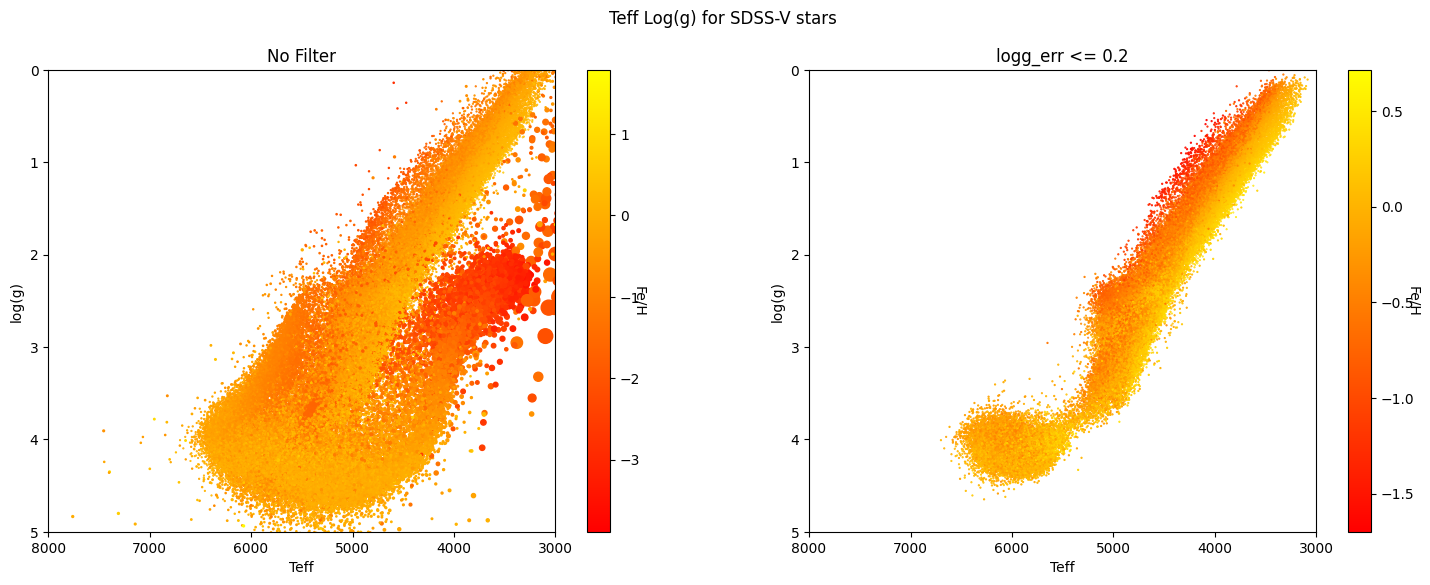

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Teff Log(g) for SDSS-V stars")
fig.set_size_inches(18, 6)

#filters to make the first plot look better
dff = df[df["teff"] > 0]
dff = dff[dff["logg"] < 10]
dff = dff[dff["Fe"] < 2]

map1 = ax1.scatter(dff["teff"], dff["logg"], s = dff["logg_err"]*2, c = dff["Fe"], cmap = "autumn")
ax1.set_title("No Filter")
ax1.set_xlabel("Teff")
ax1.set_ylabel("log(g)")
ax1.set_xlim([8000, 3000])
ax1.set_ylim([5, 0])

map2 = ax2.scatter(filt["teff"], filt["logg"], s = filt["logg_err"]*2, c = filt["Fe"], cmap = "autumn")
ax2.set_title("logg_err <= 0.2")
ax2.set_xlabel("Teff")
ax2.set_ylabel("log(g)")
ax2.set_xlim([8000, 3000])
ax2.set_ylim([5, 0])

fig.colorbar(map1).set_label("Fe/H", rotation=270)
fig.colorbar(map2).set_label("Fe/H", rotation=270)
fig.show()

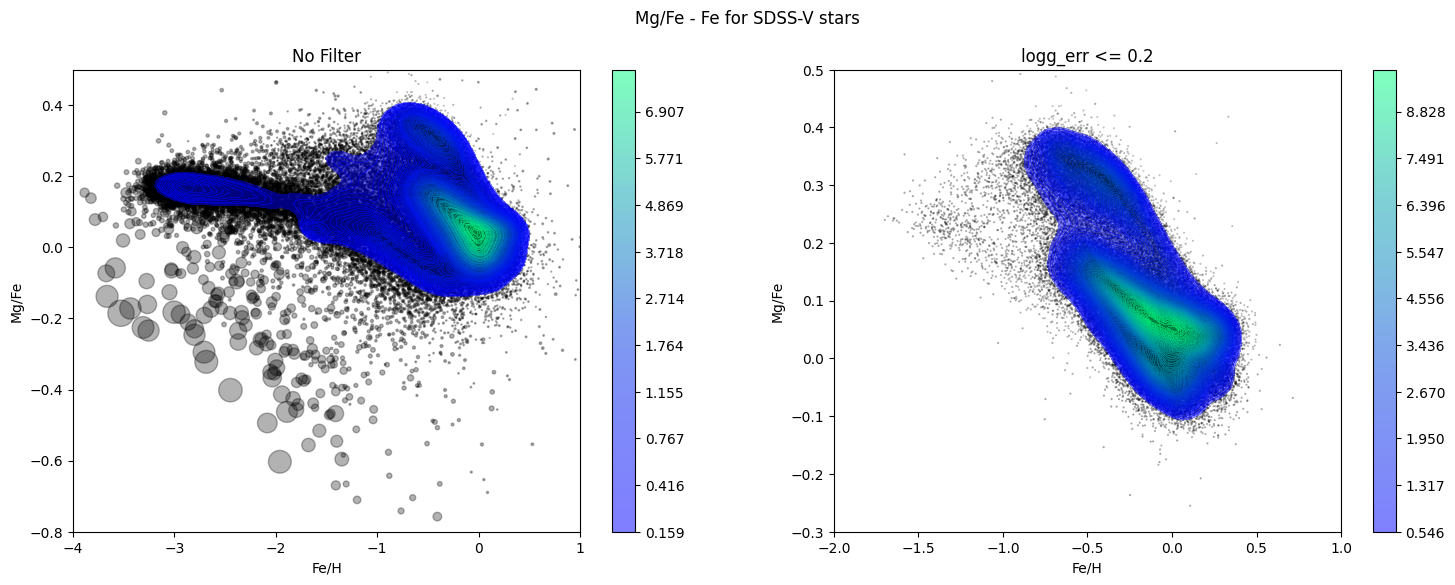

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Mg/Fe - Fe for SDSS-V stars")
fig.set_size_inches(18, 6)

#filters to make the first plot look better
dff = df[df["teff"] > 0]
dff = dff[dff["logg"] < 10]
dff = dff[dff["Fe"] < 2]

x1, y1 = dff["Fe"], dff["Mg/Fe"]
x2, y2 = filt["Fe"], filt["Mg/Fe"]
 
ax1.scatter(x1, y1, s = dff["logg_err"]*2, c = "black", alpha = 0.3)
sns.kdeplot(x=x1, y=y1, cmap="winter", levels = 100, fill=True, alpha = 0.5, cbar = True, ax = ax1)
ax1.set_title("No Filter")
ax1.set_xlabel("Fe/H")
ax1.set_ylabel("Mg/Fe")
ax1.set_xlim([-4, 1])
ax1.set_ylim([-0.8, 0.5])


ax2.scatter(x2, y2, s = filt["logg_err"]*2, c = "black", alpha = 0.3)
sns.kdeplot(x=x2, y=y2, cmap="winter", levels = 100, fill=True, alpha = 0.5, cbar = True, ax = ax2)
ax2.set_title("logg_err <= 0.2")
ax2.set_xlabel("Fe/H")
ax2.set_ylabel("Mg/Fe")
ax2.set_xlim([-2, 1])
ax2.set_ylim([-0.3, 0.5])

fig.show()